### **Imports Made**:
- Numpy for general purpose tasks (ex: file loads, matrix operations and arrangements, etc)
- sklearn.linear_model for the multiple models tested
- sklearn.mixture for Gaussian Mixture Model
- data_spliter for splitting the data into training and testing sets
- matplotlib.pyplot for plotting the data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from sklearn.svm import SVC

In [27]:
X_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
#X_train = np.load("x_smote.npy")
#y_train = np.load("y_smote.npy")
x_project = np.load("Xtest_Classification1.npy")
X_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")


# Convert training set from 0-1 to 0-255
#X_train = (X_train*256).astype(np.uint8)
#X_test = (X_test*256).astype(np.uint8)

y_test = y_test[:,0]
y_train = y_train[:,0]
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

print(X_train.shape,y_train.shape,x_project.shape,X_test.shape,y_test.shape)


(6449, 2352) (6449,) (1764, 2352) (1251, 2352) (1251,)


In [31]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.metrics import accuracy_score


# Define a custom kernel function
def rgb_histogram_kernel(X1, X2):
    # Calculate the RGB histograms for two images
    hist1 = np.histogram(X1, bins=256, range=(0, 1))[0]
    hist2 = np.histogram(X2, bins=256, range=(0, 1))[0]

    # Calculate the cosine similarity between the histograms
    similarity = np.dot(hist1, hist2) / (np.linalg.norm(hist1) * np.linalg.norm(hist2))

    return similarity

custom_kernel_matrix = pairwise_kernels(X_train, metric=rgb_histogram_kernel)
svm_classifier = SVC(kernel='precomputed')
svm_classifier.fit(custom_kernel_matrix, y_train)
custom_kernel_matrix_test = pairwise_kernels(X_test, X_train, metric=rgb_histogram_kernel)
y_predi = svm_classifier.predict(custom_kernel_matrix_test)

balanced_accuracy = balanced_accuracy_score(y_test, y_predi)
print("Balanced Accuracy Score:", balanced_accuracy)



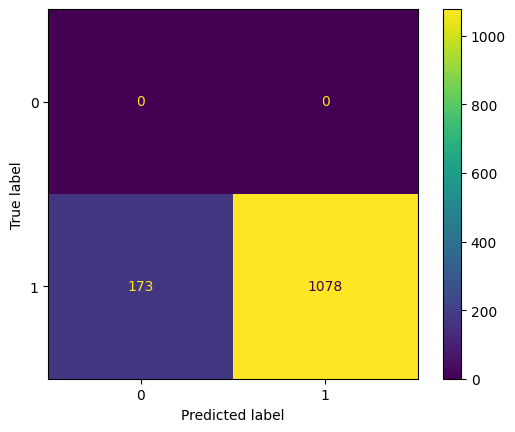

In [29]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_predi,y_test)
cm_display=ConfusionMatrixDisplay(cm).plot()